In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow import data
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

In [ ]:
# # I don't think I need these, but just for reference:
# from skimage.transform import resize
# # if need to rescale
# img_shp_desired = (100, 100, 3)
# img_resized = resize(img_cropped_2, img_shp_desired, mode='constant')
# plt.imshow(img_resized)
# # if need to grayscale
# plt.imshow(img_hsv[:,:,0], cmap='gray');

In [ ]:
# https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html

In [7]:
img_width, img_height = 256, 256
batch_size = 32
class_mode = 'categorical' # or 'binary'
# this is how we will divide the data I think.. just the total number of images
nb_train_samples = 2000
nb_validation_samples = 800
# reorg files to split into two groups?
train_dir = 'data/sat_images/data_gen_approach/train'
validation_data_dir = 'data/sat_images/data_gen_approach/test'

In [ ]:
# create train and test set
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=class_mode,
    follow_links=True)

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=class_mode,
    follow_links=True)

model.fit_generator(
    train_generator,
    steps_per_epoch=nb_train_samples // batch_size,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=nb_validation_samples // batch_size)

In [46]:
# set parameters
num_classes = 6
epochs = 3 # number of passes through the entire train dataset before weights "final"
AUTOTUNE = data.experimental.AUTOTUNE
#X_train = X_train.cache().prefetch(buffer_size=AUTOTUNE)
#X_test = X_test.cache().prefetch(buffer_size=AUTOTUNE)
img_height = 256
img_width = 256
#input_shape = (img_rows, img_cols, 1)   # 1 channel image input (grayscale) KEEP
nb_filters = 32    # number of convolutional filters to use
pool_size = (2, 2)  # pooling decreases image size, reduces computation, adds translational invariance
kernel_size = (4, 4)  # convolutional kernel size, slides over image to learn features
batch_size = 1000 # number of training samples used at a time to update the weights
# model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

# what about padding? below same uses padding if needed

# '''
# When you apply Dropout to a layer it randomly drops out (by setting the activation to zero) a 
# number of output units from the layer during the training process. Dropout takes a fractional 
# number as its input value, in the form such as 0.1, 0.2, 0.4, etc. This means dropping out 10%, 
# 20% or 40% of the output units randomly from the applied layer.
# '''

In [47]:
model = Sequential([
  layers.experimental.preprocessing.Rescaling(1./255, input_shape=(256, 256, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'), # or change filters (first num)?
  layers.MaxPooling2D(pool_size=pool_size),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=pool_size),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(pool_size=pool_size),
  layers.Flatten(),
  layers.Dense(128, activation='softmax'), # softmax?
  layers.Dense(num_classes)
])

In [48]:
model.compile(optimizer='adam',
#               loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
#               metrics=['accuracy'])
              # if multiclass then use this:
              loss = keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [49]:
# check model
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
rescaling_3 (Rescaling)      (None, 256, 256, 3)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 256, 256, 16)      448       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 128, 128, 16)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 128, 128, 32)      4640      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 32, 32, 64)       

In [51]:
# run it
history = model.fit(
            X_train,
            validation_data = X_test,
            epochs = epochs,
            batch_size=batch_size,
            verbose = 1
) # weighted_metrics

Epoch 1/3
347/347 [==============================] - 368s 1s/step - loss: 1.6369 - accuracy: 0.3610 - val_loss: 1.3387 - val_accuracy: 1.0000
Epoch 2/3
347/347 [==============================] - 374s 1s/step - loss: 1.3794 - accuracy: 0.5084 - val_loss: 1.0049 - val_accuracy: 1.0000
Epoch 3/3
347/347 [==============================] - 372s 1s/step - loss: 1.2625 - accuracy: 0.4795 - val_loss: 0.8121 - val_accuracy: 1.0000


In [52]:
# model.fit(X_train, Y_train, batch_size=batch_size, epochs=nb_epoch,
#           verbose=1, validation_data=(X_test, Y_test))

score = model.evaluate(X_test, verbose=1) # diff that model.predict ? yes.. just gets scores will predict will return classes
print('Test score:', score[0])
print('Test accuracy:', score[1])  # this is the one we care about

149/149 [==============================] - 53s 358ms/step - loss: 0.8121 - accuracy: 1.0000
Test score: 0.8120896220207214
Test accuracy: 1.0


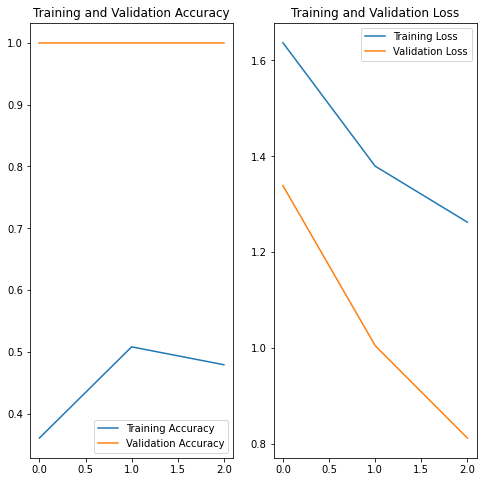

In [53]:
# plot results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
# edit this function for improvements and track model progress
def define_model(nb_filters, kernel_size, input_shape, pool_size):
    model = Sequential()  # model is a linear stack of layers (don't change)

    # note: the convolutional layers and dense layers require an activation function
    # see https://keras.io/activations/
    # and https://en.wikipedia.org/wiki/Activation_function
    # options: 'linear', 'sigmoid', 'tanh', 'relu', 'softplus', 'softsign'

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid',
                     input_shape=input_shape))  # first conv. layer  KEEP
    model.add(Activation('relu'))  # Activation specification necessary for Conv2D and Dense layers

    model.add(Conv2D(nb_filters,
                     (kernel_size[0], kernel_size[1]),
                     padding='valid'))  # 2nd conv. layer KEEP
    model.add(Activation('relu'))

    model.add(MaxPooling2D(pool_size=pool_size))  # decreases size, helps prevent overfitting
    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Flatten())  # necessary to flatten before going into conventional dense layer  KEEP
    print('Model flattened out to ', model.output_shape)

    # now start a typical neural network
    model.add(Dense(32))  # (only) 32 neurons in this layer, really?   KEEP
    model.add(Activation('tanh'))

    model.add(Dropout(0.5))  # zeros out some fraction of inputs, helps prevent overfitting

    model.add(Dense(nb_classes))  # 10 final nodes (one for each class)  KEEP
    model.add(Activation('softmax'))  # softmax at end to pick between classes 0-9 KEEP

    # many optimizers available, see https://keras.io/optimizers/#usage-of-optimizers
    # suggest you KEEP loss at 'categorical_crossentropy' for this multiclass problem,
    # and KEEP metrics at 'accuracy'
    # suggest limiting optimizers to one of these: 'adam', 'adadelta', 'sgd'
    model.compile(loss='categorical_crossentropy',
                  optimizer='adam',
                  metrics=['accuracy'])
    return model

In [ ]:
model2 = define_model(nb_filters, kernel_size, input_shape, pool_size)

In [ ]:
# augmentation?
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)